In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import re
sns.set_style("darkgrid")
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
import numpy as np
import pandas as pd 

In [2]:
dataset = pd.read_csv("C:Downloads/suiciderates/master.csv", low_memory=False)
dataset.columns
dataset.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [3]:
dataset.shape

(27820, 12)

In [4]:
dataset.sample(frac=0.01)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
397,Antigua and Barbuda,1998,female,25-34 years,0,8332,0.00,Antigua and Barbuda1998,NaN,"727,860,593",10078,Generation X
3415,Belarus,2011,female,5-14 years,1,435715,0.23,Belarus2011,0.793,"61,757,788,945",6902,Generation Z
23277,Slovenia,2015,male,55-74 years,120,239919,50.02,Slovenia2015,NaN,"43,072,415,017",22036,Boomers
26727,United Kingdom,2005,male,5-14 years,4,3781379,0.11,United Kingdom2005,0.890,"2,520,701,818,182",44372,Millenials
1307,Aruba,2002,male,25-34 years,2,6459,30.96,Aruba2002,NaN,"1,941,094,972",21987,Generation X
7772,Ecuador,1991,female,25-34 years,35,792300,4.42,Ecuador1991,NaN,"16,988,535,268",1869,Boomers
25002,Thailand,1987,male,55-74 years,239,2100709,11.38,Thailand1987,NaN,"50,535,438,696",1045,G.I. Generation
5730,Colombia,1992,male,5-14 years,17,3917400,0.43,Colombia1992,NaN,"49,279,585,355",1664,Millenials
13930,Kazakhstan,2006,male,75+ years,71,116133,61.14,Kazakhstan2006,NaN,"81,003,884,545",5770,Silent
3432,Belarus,2014,male,15-24 years,128,578690,22.12,Belarus2014,0.798,"78,813,839,984",8849,Millenials


In [5]:
dataset.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [6]:
dataset=dataset.rename(columns={'country':'Country','year':'Year','sex':'Gender','age':'Age','suicides_no':'SuicidesNo','population':'Population','suicides/100k pop':'Suicides100kPop','country-year':'CountryYear','HDI for year':'HDIForYear',' gdp_for_year ($) ':'GdpForYearMoney','gdp_per_capita ($)':'GdpPerCapitalMoney','generation':'Generation'})

In [8]:
dataset.columns

Index(['Country', 'Year', 'Gender', 'Age', 'SuicidesNo', 'Population',
       'Suicides100kPop', 'CountryYear', 'HDIForYear', 'GdpForYearMoney',
       'GdpPerCapitalMoney', 'Generation'],
      dtype='object')

In [11]:
dataset.isnull().any()

Country               False
Year                  False
Gender                False
Age                   False
SuicidesNo            False
Population            False
Suicides100kPop       False
CountryYear           False
HDIForYear             True
GdpForYearMoney       False
GdpPerCapitalMoney    False
Generation            False
dtype: bool

In [13]:
dataset.isnull().values.any()

True

In [14]:
dataset.isnull().sum()

Country                   0
Year                      0
Gender                    0
Age                       0
SuicidesNo                0
Population                0
Suicides100kPop           0
CountryYear               0
HDIForYear            19456
GdpForYearMoney           0
GdpPerCapitalMoney        0
Generation                0
dtype: int64

In [16]:
dataset = dataset.drop(['HDIForYear'], axis = 1)

In [17]:
dataset.columns

Index(['Country', 'Year', 'Gender', 'Age', 'SuicidesNo', 'Population',
       'Suicides100kPop', 'CountryYear', 'GdpForYearMoney',
       'GdpPerCapitalMoney', 'Generation'],
      dtype='object')

In [19]:
dataset.shape

(27820, 11)

In [21]:
minimum_year = min(dataset.Year)
maximum_year = max(dataset.Year)
print(minimum_year, maximum_year)

1985 2016


In [49]:
suNo = []
for i in dataset.Country.unique():
    #suNo.append(i)
    suNo.append(sum(dataset[dataset['Country'] == i].SuicidesNo))
suNo = pd.DataFrame(suNo,columns=['suNo'])
Country_Name = pd.DataFrame(dataset.Country.unique(),columns=['Country_Name'])
data_suNo_countryname = pd.concat([Country_Name, suNo],axis = 1)
data_suNo_countryname = data_suNo_countryname.sort_values(by='suNo',ascending=False)

In [50]:
print(data_suNo_countryname)

                    Country_Name     suNo
75            Russian Federation  1209742
98                 United States  1034013
46                         Japan   806902
33                        France   329127
95                       Ukraine   319950
35                       Germany   291262
73             Republic of Korea   261730
15                        Brazil   226613
69                        Poland   139098
97                United Kingdom   136805
44                         Italy   132060
58                        Mexico   111139
91                      Thailand   110643
18                        Canada   107561
47                    Kazakhstan   101546
86                         Spain   100202
2                      Argentina    82219
40                       Hungary    73891
74                       Romania    72777
5                      Australia    70111
12                       Belgium    62761
11                       Belarus    59892
87                     Sri Lanka  

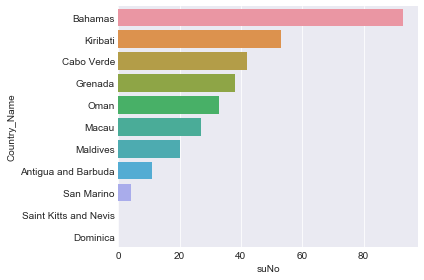

In [67]:
sns.barplot(y = data_suNo_countryname.Country_Name[90:],x = data_suNo_countryname.suNo[90:]) 
plt.tight_layout()
plt.show()